# Calcification Detection In Mammograms

This is the official demo of the *SPIE 2021* paper: [Segmenting Microcalcifications in Mammograms and its Applications](https://arxiv.org/abs/2102.00811)

**Before we start**, to speed-up the computation time follow the following instructions:


1.   Go to *Runtime* In the top menu
2.   Choose *Change runtime type*
3.   Set *GPU* as *Hardware accelerator*
4.   Press Save


## Dowload code files

In [3]:
!git clone https://github.com/roeez/CalcificationDetection.git

Cloning into 'CalcificationDetection'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 11 (delta 1), reused 0 (delta 0), pack-reused 7
Unpacking objects: 100% (11/11), 6.90 MiB | 8.93 MiB/s, done.


## Import required libraries

In [4]:
from CalcificationDetection.core import *
from ipywidgets import interact
from functools import partial
from  ipywidgets.widgets import FloatSlider

# Telio: More import


In [5]:
import os
import numpy as np

import matplotlib.pyplot as plt

import cv2



## Run this cell to load a default mammogram for example

In [6]:
processed_mamm = load_mamm('CalcificationDetection/00001.png')

# Telio :  check and plot input


Image type: float32


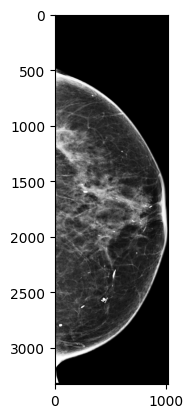

In [11]:
#check
print("Image size:",processed_mamm.shape)
print("Image type:",processed_mamm.dtype)

#plot
plt.close('all')
plt.figure()
plt.imshow(processed_mamm,cmap = plt.cm.gray)

## Run this cell to upload a mammogram
Not necessary if we want to use the pre-defined image :00001

In [5]:
processed_mamm = upload_mamm()

Saving Breast_Image_00001.png to Breast_Image_00001.png


## Run the model to detect calcifications









In [7]:
prediction = predict(model, processed_mamm)
#prediction = core.predict(core.model, mammog)

# Telio: Check and plot result


Image size: (3328, 1021)
Image type: float32


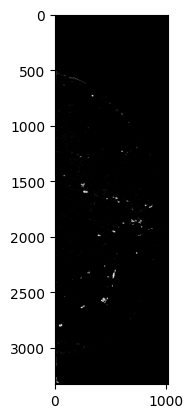

In [13]:
#check
print("Image size:",prediction.shape)
print("Image type:",prediction.dtype)

# plot
plt.figure()
plt.imshow(prediction,cmap = plt.cm.gray)

# Telio: trying various modification for adaptation to algo 2 (HPV)


In [39]:
# Copy
copy = np.copy(prediction)

# Binarization
prediction_modified=[copy>= 0.2]
prediction_modified= np.squeeze(prediction_modified)

#Mask
prediction_modified = prediction_modified * prediction

#Inversion
prediction_modified = 1 - prediction_modified

#prediction_modified = prediction_modified * 255


# Telio: Check and plot : Modified predict

Image size: (3328, 1021)
Image type: float32


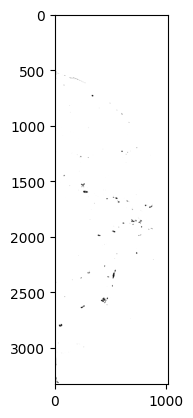

In [40]:
#check
print("Image size:",prediction_modified.shape)
print("Image type:",prediction_modified.dtype)

# plot
plt.figure()
plt.imshow(prediction_modified,cmap = plt.cm.gray)

# Telio : Only if you are using Google Drive

In [14]:
from google.colab import drive

# Google drive mount
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Telio: Save images for algo 2 (HPV)

In [16]:
# Directory path on Google Drive
directory_path = "/content/drive/MyDrive/Colab_Notebooks/HMU_Internship_Telio/CalcificationDetection_Initial/Saved_Images"
#directory_path = put your own path

# Check if the directory exists, create it if not
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

#Loaded mammog
file_path1 = os.path.join(directory_path, "input_ex.tif")

#First prediction
file_path2 = os.path.join(directory_path, "output_ex.tif")

#Modified prediction
file_path3 = os.path.join(directory_path, "modified_ouput.tif")

#PNG format
file_path4 = os.path.join(directory_path, "input_ex.png")
processed_mamm_p = processed_mamm * 255

file_path5 = os.path.join(directory_path, "output_ex.png")
prediction_p = prediction * 255

file_path6 = os.path.join(directory_path, "modified_ouput_ex.png")
prediction_modified_p = prediction_modified * 255

# Saving
cv2.imwrite(file_path1, processed_mamm)
cv2.imwrite(file_path2, prediction)
cv2.imwrite(file_path3, prediction_modified)
cv2.imwrite(file_path4, processed_mamm_p)
cv2.imwrite(file_path5, prediction_p)
cv2.imwrite(file_path6, prediction_modified_p)

True

## Show results

Use the slide bar to change threshold of the results (it can take about 30 secs to show the updated results)

In [20]:
foo = partial(show_mamm_w_boxes, processed_mamm, prediction)
#foo = partial(show_mamm_w_boxes, processed_mamm, prediction_modified)
foo.__name__ = "foo"
interact(foo, th=FloatSlider(min=0, max=1, step=.01, value=.5));

interactive(children=(FloatSlider(value=0.5, description='th', max=1.0, step=0.01), Output()), _dom_classes=('…